# Analyze Metrics and Conduct Inference.ipynb

In [71]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from Analysis_Functions import *


In [72]:
# Load Combined_Data.xlsx
combined_data = pd.read_excel('Combined_Data.xlsx')

# GSM8k data - limit to task = "gsm8k"
gsm8k_data = combined_data[combined_data['task'] == 'gsm8k']

# Creative writing data - limit to task = "cw"
cw_data = combined_data[combined_data['task'] == 'cw']


In [73]:
# Load plot_settings.pickle
import pickle

with open('order_list.pkl', 'rb') as f:
    order_list = pickle.load(f)
print(order_list)

with open('hue_order_pub_date_no_dp.pkl', 'rb') as f:
    hue_order_pub_date_no_dp = pickle.load(f)
print(hue_order_pub_date_no_dp)

with open('hue_order_pub_date.pkl', 'rb') as f:
    hue_order_pub_date = pickle.load(f)
print(hue_order_pub_date)

with open('hue_order_introduced.pkl', 'rb') as f:
    hue_order_introduced = pickle.load(f)
print(hue_order_introduced)

# Set the font to Times New Roman or a similar serif font
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
# Optionally, set the font size
mpl.rcParams['font.size'] = 12

# Figure size
f_size = (16 / 2, 9 / 2)

# Function necessary to flip the legend
import itertools
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])


['Text-Davinci-003', 'GPT-4']
['Manual Few-Shot', 'Manual CoT', 'Least-to-Most', 'Zero-Shot CoT', 'APE Zero-Shot CoT', 'Self-Refine', 'Tree-of-Thought']
['Manual Few-Shot', 'Manual CoT', 'Least-to-Most', 'Zero-Shot CoT', 'APE Zero-Shot CoT', 'Self-Refine', 'Tree-of-Thought', 'Direct Prompting']
['Direct Prompting', 'Zero-Shot CoT', 'APE Zero-Shot CoT', 'Tree-of-Thought', 'Self-Refine', 'Least-to-Most', 'Manual Few-Shot', 'Manual CoT']


## Complexity

Big table of complexity metrics

Possibly plots for differences or another table

Possibly a separate table for ease of review scores

### Large table for num_linebreaks, num_sentences, num_step_i, num_1_dot_etc, sentence_length, fres, ease_of_review_1_easy_10_hard (possibly)

Modified from length code

In [74]:
# In combined_data, keep columns
limited_combined_data = combined_data[['Model', 'Method', 'Task', 'model', 'method', 'task', 'num_linebreaks', 'num_sentences', 'num_step_i', 'num_1_dot_etc', 'sentence_length', 'fres'
                                       #, 'ease_of_review_1_easy_10_hard'
                                       ]]

# Stack by Model and Method
stacked_combined_data = limited_combined_data.set_index(['Model', 'Method', 'Task', 'model', 'method', 'task']).stack().reset_index().rename(columns = {'level_6': 'metric', 0: 'Value'})

stacked_combined_data


,Model,Method,Task,model,method,task,metric,Value
0,Text-Davinci-003,Direct Prompting,Creative Writing,td3,direct_prompting,cw,num_linebreaks,1.000000
1,Text-Davinci-003,Direct Prompting,Creative Writing,td3,direct_prompting,cw,num_sentences,7.000000
2,Text-Davinci-003,Direct Prompting,Creative Writing,td3,direct_prompting,cw,num_step_i,0.000000
3,Text-Davinci-003,Direct Prompting,Creative Writing,td3,direct_prompting,cw,num_1_dot_etc,0.000000
4,Text-Davinci-003,Direct Prompting,Creative Writing,td3,direct_prompting,cw,sentence_length,16.571429
...,...,...,...,...,...,...,...,...
15995,GPT-4,Manual CoT,GSM8K,gpt4,manual_cot,gsm8k,num_1_dot_etc,1.000000
15996,GPT-4,Manual CoT,GSM8K,gpt4,manual_cot,gsm8k,num_linebreaks,0.000000
15997,GPT-4,Manual CoT,GSM8K,gpt4,manual_cot,gsm8k,num_sentences,4.000000
15998,GPT-4,Manual CoT,GSM8K,gpt4,manual_cot,gsm8k,num_step_i,0.000000


In [75]:
# Average Value by model, method, metric
# Also get variance
avg_metric_with_variance = stacked_combined_data.groupby(['Model', 'Method', 'Task', 'model', 'method', 'task', 'metric']).agg(['mean', 'var'])['Value'].reset_index()

avg_metric_with_variance


,Model,Method,Task,model,method,task,metric,mean,var
0,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,fres,60.737800,44.725714
1,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,num_1_dot_etc,2.810000,7.205960
2,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,num_linebreaks,0.000000,0.000000
3,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,num_sentences,15.430000,15.176869
4,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,num_step_i,0.900000,3.949495
...,...,...,...,...,...,...,...,...,...
155,Text-Davinci-003,Zero-Shot CoT,Creative Writing,td3,zero_shot_cot,cw,sentence_length,17.526842,12.881031
156,Text-Davinci-003,Zero-Shot CoT,GSM8K,td3,zero_shot_cot,gsm8k,num_1_dot_etc,1.840000,6.842828
157,Text-Davinci-003,Zero-Shot CoT,GSM8K,td3,zero_shot_cot,gsm8k,num_linebreaks,3.250000,3.017677
158,Text-Davinci-003,Zero-Shot CoT,GSM8K,td3,zero_shot_cot,gsm8k,num_sentences,4.660000,5.317576


In [76]:
# Add significance
# Load all_inference.xlsx
all_inference = pd.read_excel('all_inference.xlsx')

# Merge with avg_metric_with_variance
avg_metric_with_variance = pd.merge(avg_metric_with_variance, all_inference, how = 'left', on = ['model', 'method', 'task', 'metric'])

# Create column stars if Significant at 95% == "Yes"
avg_metric_with_variance['stars'] = avg_metric_with_variance['Significant at 95%'].apply(lambda x: '*' if x == 'Yes' else '')

avg_metric_with_variance


,Model,Method,Task,model,method,task,metric,mean,var,statistic,pvalue,statistic_with_correction,pvalue_with_correction,Significant at 95%,dp_mean,using_method_mean,stars
0,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,fres,60.737800,44.725714,3.970500,1.360541e-04,NaN,NaN,Yes,63.776700,60.737800,*
1,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,num_1_dot_etc,2.810000,7.205960,-10.467920,1.045234e-17,NaN,NaN,Yes,0.000000,2.810000,*
2,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,num_linebreaks,0.000000,0.000000,NaN,NaN,NaN,NaN,No,0.000000,0.000000,
3,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,num_sentences,15.430000,15.176869,-9.181456,6.672394e-15,NaN,NaN,Yes,11.320000,15.430000,*
4,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,num_step_i,0.900000,3.949495,-4.528681,1.658137e-05,NaN,NaN,Yes,0.000000,0.900000,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Text-Davinci-003,Zero-Shot CoT,Creative Writing,td3,zero_shot_cot,cw,sentence_length,17.526842,12.881031,2.014844,4.663257e-02,NaN,NaN,Yes,18.356729,17.526842,*
156,Text-Davinci-003,Zero-Shot CoT,GSM8K,td3,zero_shot_cot,gsm8k,num_1_dot_etc,1.840000,6.842828,-3.843716,2.142389e-04,NaN,NaN,Yes,0.720000,1.840000,*
157,Text-Davinci-003,Zero-Shot CoT,GSM8K,td3,zero_shot_cot,gsm8k,num_linebreaks,3.250000,3.017677,-16.669221,1.700380e-30,NaN,NaN,Yes,0.160000,3.250000,*
158,Text-Davinci-003,Zero-Shot CoT,GSM8K,td3,zero_shot_cot,gsm8k,num_sentences,4.660000,5.317576,-12.313699,1.100106e-21,NaN,NaN,Yes,1.490000,4.660000,*


In [77]:
# Combine mean and variance into one column that is a string with the mean and then the variance in parentheses
avg_metric_with_variance['Value'] = avg_metric_with_variance.apply(lambda row: str(round(row['mean'], 2)) + row['stars'] + ' (' + str(round(row['var'], 2)) + ')', axis=1)
# But set Value to just be mean if metric is compliance or correct
avg_metric_with_variance.loc[avg_metric_with_variance['metric'].isin(['compliance', 'correct']), 'Value'] = avg_metric_with_variance['mean'].round(2).astype(str) + avg_metric_with_variance['stars']

# Drop mean and variance columns, other columns
avg_metric_with_variance = avg_metric_with_variance[['Model', 'Method', 'Task', 'metric', 'Value']].rename(columns = {'metric': 'Metric'})

avg_metric_with_variance


,Model,Method,Task,Metric,Value
0,GPT-4,APE Zero-Shot CoT,Creative Writing,fres,60.738* (44.726)
1,GPT-4,APE Zero-Shot CoT,Creative Writing,num_1_dot_etc,2.81* (7.206)
2,GPT-4,APE Zero-Shot CoT,Creative Writing,num_linebreaks,0.0 (0.0)
3,GPT-4,APE Zero-Shot CoT,Creative Writing,num_sentences,15.43* (15.177)
4,GPT-4,APE Zero-Shot CoT,Creative Writing,num_step_i,0.9* (3.949)
...,...,...,...,...,...
155,Text-Davinci-003,Zero-Shot CoT,Creative Writing,sentence_length,17.527* (12.881)
156,Text-Davinci-003,Zero-Shot CoT,GSM8K,num_1_dot_etc,1.84* (6.843)
157,Text-Davinci-003,Zero-Shot CoT,GSM8K,num_linebreaks,3.25* (3.018)
158,Text-Davinci-003,Zero-Shot CoT,GSM8K,num_sentences,4.66* (5.318)


In [78]:
# Pivot table - column method should go wide
avg_metric_pivot = avg_metric_with_variance.set_index(['Task', 'Metric', 'Model', 'Method']).unstack()
#pivot_table(index=['model', 'task'], columns='method', values='accuracy_quality').reset_index()

# Fix axis
avg_metric_pivot = avg_metric_pivot.rename_axis([None, None], axis=1).reset_index()

avg_metric_pivot


Task           Metric             Model             Value  \
                                                        APE Zero-Shot CoT   
0   Creative Writing             fres             GPT-4  60.738* (44.726)   
1   Creative Writing             fres  Text-Davinci-003  71.928* (78.946)   
2   Creative Writing    num_1_dot_etc             GPT-4     2.81* (7.206)   
3   Creative Writing    num_1_dot_etc  Text-Davinci-003     0.51* (0.798)   
4   Creative Writing   num_linebreaks             GPT-4         0.0 (0.0)   
5   Creative Writing   num_linebreaks  Text-Davinci-003     4.37* (8.842)   
6   Creative Writing    num_sentences             GPT-4   15.43* (15.177)   
7   Creative Writing    num_sentences  Text-Davinci-003    10.12* (6.167)   
8   Creative Writing       num_step_i             GPT-4      0.9* (3.949)   
9   Creative Writing       num_step_i  Text-Davinci-003     1.62* (3.187)   
10  Creative Writing  sentence_length             GPT-4   23.321 (30.685)   
11  Creative Writing  sentence_length  Text-Davinci-003   18.259 (15.958)   
12             GSM8K    num_1_dot_etc             GPT-4     1.95* (10.29)   
13             GSM8K    num_1_dot_etc  Text-Davinci-003    2.33* (10.486)   
14             GSM8K   num_linebreaks             GPT-4         0.0 (0.0)   
15             GSM8K   num_linebreaks  Text-Davinci-003     4.44* (5.602)   
16             GSM8K    num_sentences             GPT-4     3.15* (3.462)   
17             GSM8K    num_sentences  Text-Davinci-003     4.38* (9.046)   
18             GSM8K       num_step_i             GPT-4     0.39* (1.311)   
19             GSM8K       num_step_i  Text-Davinci-003     0.56* (1.562)   

                                                                           \
   Direct Prompting     Least-to-Most        Manual CoT   Manual Few-Shot   
0   63.777 (51.289)  67.365* (35.657)  67.764* (51.021)  67.844* (55.254)   
1   74.734 (67.907)   75.955 (32.471)   74.102 (38.718)   76.657* (57.45)   
2         0.0 (0.0)     2.49* (0.495)     0.94* (1.815)         0.0 (0.0)   
3         0.0 (0.0)      2.99* (0.01)      2.9* (0.212)       0.01 (0.01)   
4         0.0 (0.0)         0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   
5       0.98 (0.06)      7.03* (0.09)     6.01* (0.252)     1.07* (0.066)   
6     11.32 (5.169)    14.76* (6.002)     11.93 (7.278)    10.25* (3.563)   
7       7.6 (1.778)    17.82* (3.543)      15.8* (2.97)    10.08* (3.468)   
8         0.0 (0.0)         0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   
9         0.0 (0.0)         0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   
10   22.614 (8.856)   20.948* (7.556)    21.16* (9.845)   21.301* (7.933)   
11   18.357 (7.107)   15.055* (2.132)   16.256* (2.722)    18.223 (6.597)   
12     1.28 (8.891)     6.95* (11.26)     2.8* (13.717)     0.04* (0.039)   
13     0.72 (3.133)     6.96* (9.372)     2.54* (6.918)     0.04* (0.039)   
14        0.0 (0.0)         0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   
15      0.16 (0.52)     4.16* (3.408)        0.0* (0.0)        0.0* (0.0)   
16     1.51 (0.333)     8.59* (6.628)      3.5* (2.374)        1.0* (0.0)   
17     1.49 (0.939)    12.31* (9.368)     4.96* (1.493)        1.0* (0.0)   
18        0.0 (0.0)         0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   
19        0.0 (0.0)         0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   

                                                         
        Self-Refine   Tree-of-Thought     Zero-Shot CoT  
0   62.369 (51.285)  57.567* (43.817)  59.945* (50.179)  
1   73.692 (61.792)  66.679* (66.794)  72.385* (72.852)  
2       0.8* (1.03)     3.93* (2.187)     3.58* (5.579)  
3     0.63* (0.619)     2.84* (0.843)     0.85* (1.402)  
4     1.56* (0.815)        4.0* (0.0)         0.0 (0.0)  
5      3.1* (2.374)    11.29* (7.562)     4.67* (6.082)  
6   15.97* (59.787)   39.42* (38.206)    15.92* (10.64)  
7   13.54* (28.796)   31.37* (47.549)    10.03* (5.686)  
8         0.0 (0.0)         0.0 (0.0)     0.66

In [79]:
# Unique values of metric
avg_metric_pivot['Metric'].unique()


array(['fres', 'num_1_dot_etc', 'num_linebreaks', 'num_sentences',
       'num_step_i', 'sentence_length'], dtype=object)

In [80]:
# Recode Metric column
avg_metric_pivot['Metric'] = avg_metric_pivot['Metric'].replace({
    'ease_of_review_1_easy_10_hard' : 'Ease of Review (1 = Easy, 10 = Hard)',
    'fres' : 'Flesch Reading Ease Score',
    'num_1_dot_etc' : 'Number of 1., 2., etc.',
    'num_linebreaks' : 'Number of Linebreaks',
    'num_sentences' : 'Number of Sentences',
    'num_step_i' : 'Number of Step 1, Step 2, etc.',
    'sentence_length' : 'Sentence Length'
    })

avg_metric_pivot


Task                          Metric             Model  \
                                                                         
0   Creative Writing       Flesch Reading Ease Score             GPT-4   
1   Creative Writing       Flesch Reading Ease Score  Text-Davinci-003   
2   Creative Writing          Number of 1., 2., etc.             GPT-4   
3   Creative Writing          Number of 1., 2., etc.  Text-Davinci-003   
4   Creative Writing            Number of Linebreaks             GPT-4   
5   Creative Writing            Number of Linebreaks  Text-Davinci-003   
6   Creative Writing             Number of Sentences             GPT-4   
7   Creative Writing             Number of Sentences  Text-Davinci-003   
8   Creative Writing  Number of Step 1, Step 2, etc.             GPT-4   
9   Creative Writing  Number of Step 1, Step 2, etc.  Text-Davinci-003   
10  Creative Writing                 Sentence Length             GPT-4   
11  Creative Writing                 Sentence Length  Text-Davinci-003   
12             GSM8K          Number of 1., 2., etc.             GPT-4   
13             GSM8K          Number of 1., 2., etc.  Text-Davinci-003   
14             GSM8K            Number of Linebreaks             GPT-4   
15             GSM8K            Number of Linebreaks  Text-Davinci-003   
16             GSM8K             Number of Sentences             GPT-4   
17             GSM8K             Number of Sentences  Text-Davinci-003   
18             GSM8K  Number of Step 1, Step 2, etc.             GPT-4   
19             GSM8K  Number of Step 1, Step 2, etc.  Text-Davinci-003   

               Value                                                       \
   APE Zero-Shot CoT Direct Prompting     Least-to-Most        Manual CoT   
0   60.738* (44.726)  63.777 (51.289)  67.365* (35.657)  67.764* (51.021)   
1   71.928* (78.946)  74.734 (67.907)   75.955 (32.471)   74.102 (38.718)   
2      2.81* (7.206)        0.0 (0.0)     2.49* (0.495)     0.94* (1.815)   
3      0.51* (0.798)        0.0 (0.0)      2.99* (0.01)      2.9* (0.212)   
4          0.0 (0.0)        0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   
5      4.37* (8.842)      0.98 (0.06)      7.03* (0.09)     6.01* (0.252)   
6    15.43* (15.177)    11.32 (5.169)    14.76* (6.002)     11.93 (7.278)   
7     10.12* (6.167)      7.6 (1.778)    17.82* (3.543)      15.8* (2.97)   
8       0.9* (3.949)        0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   
9      1.62* (3.187)        0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   
10   23.321 (30.685)   22.614 (8.856)   20.948* (7.556)    21.16* (9.845)   
11   18.259 (15.958)   18.357 (7.107)   15.055* (2.132)   16.256* (2.722)   
12     1.95* (10.29)     1.28 (8.891)     6.95* (11.26)     2.8* (13.717)   
13    2.33* (10.486)     0.72 (3.133)     6.96* (9.372)     2.54* (6.918)   
14         0.0 (0.0)        0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   
15     4.44* (5.602)      0.16 (0.52)     4.16* (3.408)        0.0* (0.0)   
16     3.15* (3.462)     1.51 (0.333)     8.59* (6.628)      3.5* (2.374)   
17     4.38* (9.046)     1.49 (0.939)    12.31* (9.368)     4.96* (1.493)   
18     0.39* (1.311)        0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   
19     0.56* (1.562)        0.0 (0.0)         0.0 (0.0)         0.0 (0.0)   

                                                                           
     Manual Few-Shot      Self-Refine   Tree-of-Thought     Zero-Shot CoT  
0   67.844* (55.254)  62.369 (51.285)  57.567* (43.817)  59.945* (50.179)  
1    76.657* (57.45)  73.692 (61.792)  66.679* (66.794)  72.385* (72.852)  
2          0.0 (0.0)      0.8* (1.03)     3.93* (2.187)     3.58* (5.579)  
3        0.01 (0.01)    0.63* (0.619)     2.84* (0.843)     0.85* (1.402)  
4          0.0 (0.0)    1.56* (0.815)        4.0* (0.0)         0.0 (0.0)  
5      1.07* (0.066)     3.1* (2.374)    11.29* (7.562)     4.67* (6.082)  
6     10.25* (3.563)  15.97* (59.787)   39.42* (38.206)    15.92* (10.64)  
7     10

In [81]:
# Flatten columns
flattened_cols = [''.join(col).strip().replace('Value', '') for col in avg_metric_pivot.columns.values]
avg_metric_pivot.columns = flattened_cols

avg_metric_pivot


,Task,Metric,Model,APE Zero-Shot CoT,Direct Prompting,Least-to-Most,Manual CoT,Manual Few-Shot,Self-Refine,Tree-of-Thought,Zero-Shot CoT
0,Creative Writing,Flesch Reading Ease Score,GPT-4,60.738* (44.726),63.777 (51.289),67.365* (35.657),67.764* (51.021),67.844* (55.254),62.369 (51.285),57.567* (43.817),59.945* (50.179)
1,Creative Writing,Flesch Reading Ease Score,Text-Davinci-003,71.928* (78.946),74.734 (67.907),75.955 (32.471),74.102 (38.718),76.657* (57.45),73.692 (61.792),66.679* (66.794),72.385* (72.852)
2,Creative Writing,"Number of 1., 2., etc.",GPT-4,2.81* (7.206),0.0 (0.0),2.49* (0.495),0.94* (1.815),0.0 (0.0),0.8* (1.03),3.93* (2.187),3.58* (5.579)
3,Creative Writing,"Number of 1., 2., etc.",Text-Davinci-003,0.51* (0.798),0.0 (0.0),2.99* (0.01),2.9* (0.212),0.01 (0.01),0.63* (0.619),2.84* (0.843),0.85* (1.402)
4,Creative Writing,Number of Linebreaks,GPT-4,0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),1.56* (0.815),4.0* (0.0),0.0 (0.0)
5,Creative Writing,Number of Linebreaks,Text-Davinci-003,4.37* (8.842),0.98 (0.06),7.03* (0.09),6.01* (0.252),1.07* (0.066),3.1* (2.374),11.29* (7.562),4.67* (6.082)
6,Creative Writing,Number of Sentences,GPT-4,15.43* (15.177),11.32 (5.169),14.76* (6.002),11.93 (7.278),10.25* (3.563),15.97* (59.787),39.42* (38.206),15.92* (10.64)
7,Creative Writing,Number of Sentences,Text-Davinci-003,10.12* (6.167),7.6 (1.778),17.82* (3.543),15.8* (2.97),10.08* (3.468),13.54* (28.796),31.37* (47.549),10.03* (5.686)
8,Creative Writing,"Number of Step 1, Step 2, etc.",GPT-4,0.9* (3.949),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.66* (2.974)
9,Creative Writing,"Number of Step 1, Step 2, etc.",Text-Davinci-003,1.62* (3.187),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),1.71* (2.935)


In [82]:
# Print values of Metric
avg_metric_pivot['Metric'].unique()


array(['Flesch Reading Ease Score', 'Number of 1., 2., etc.',
       'Number of Linebreaks', 'Number of Sentences',
       'Number of Step 1, Step 2, etc.', 'Sentence Length'], dtype=object)

In [83]:
# Sort rows
avg_metric_pivot['Task'] = pd.Categorical(avg_metric_pivot['Task'], ["GSM8K", "Creative Writing"])
avg_metric_pivot['Metric'] = pd.Categorical(avg_metric_pivot['Metric'], [
    "Number of Linebreaks",
    "Number of Sentences",
    "Number of Step 1, Step 2, etc.",
    "Number of 1., 2., etc.",
    "Sentence Length",
    "Flesch Reading Ease Score"
    ])
avg_metric_pivot['Model'] = pd.Categorical(avg_metric_pivot['Model'], ["Text-Davinci-003", "GPT-4"])
avg_metric_pivot = avg_metric_pivot.sort_values(by=['Task', 'Metric', 'Model'])

print(avg_metric_pivot.columns)
avg_metric_pivot


Index(['Task', 'Metric', 'Model', 'APE Zero-Shot CoT', 'Direct Prompting',
       'Least-to-Most', 'Manual CoT', 'Manual Few-Shot', 'Self-Refine',
       'Tree-of-Thought', 'Zero-Shot CoT'],
      dtype='object')


,Task,Metric,Model,APE Zero-Shot CoT,Direct Prompting,Least-to-Most,Manual CoT,Manual Few-Shot,Self-Refine,Tree-of-Thought,Zero-Shot CoT
15,GSM8K,Number of Linebreaks,Text-Davinci-003,4.44* (5.602),0.16 (0.52),4.16* (3.408),0.0* (0.0),0.0* (0.0),1.16* (0.439),1.39* (0.867),3.25* (3.018)
14,GSM8K,Number of Linebreaks,GPT-4,0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),2.2* (0.97),5.11* (6.604),0.0 (0.0)
17,GSM8K,Number of Sentences,Text-Davinci-003,4.38* (9.046),1.49 (0.939),12.31* (9.368),4.96* (1.493),1.0* (0.0),2.25* (1.098),8.41* (11.396),4.66* (5.318)
16,GSM8K,Number of Sentences,GPT-4,3.15* (3.462),1.51 (0.333),8.59* (6.628),3.5* (2.374),1.0* (0.0),5.12* (5.319),8.03* (18.231),2.84* (2.58)
19,GSM8K,"Number of Step 1, Step 2, etc.",Text-Davinci-003,0.56* (1.562),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),2.0* (0.0),0.32* (1.048)
18,GSM8K,"Number of Step 1, Step 2, etc.",GPT-4,0.39* (1.311),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.22 (1.749),0.0 (0.0)
13,GSM8K,"Number of 1., 2., etc.",Text-Davinci-003,2.33* (10.486),0.72 (3.133),6.96* (9.372),2.54* (6.918),0.04* (0.039),0.5 (0.98),1.0 (0.0),1.84* (6.843)
12,GSM8K,"Number of 1., 2., etc.",GPT-4,1.95* (10.29),1.28 (8.891),6.95* (11.26),2.8* (13.717),0.04* (0.039),2.36* (19.283),3.5* (17.909),1.99 (13.202)
5,Creative Writing,Number of Linebreaks,Text-Davinci-003,4.37* (8.842),0.98 (0.06),7.03* (0.09),6.01* (0.252),1.07* (0.066),3.1* (2.374),11.29* (7.562),4.67* (6.082)
4,Creative Writing,Number of Linebreaks,GPT-4,0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),1.56* (0.815),4.0* (0.0),0.0 (0.0)


In [84]:
# Order columns
starter_col_order = ['Task', 'Metric', 'Model']
col_order = starter_col_order + hue_order_pub_date
print(col_order)
avg_metric_pivot = avg_metric_pivot[col_order]

# Convert Model, Task, Metric back to string from Categorical
avg_metric_pivot['Model'] = avg_metric_pivot['Model'].astype(str)
avg_metric_pivot['Task'] = avg_metric_pivot['Task'].astype(str)
avg_metric_pivot['Metric'] = avg_metric_pivot['Metric'].astype(str)

# Delete values of Task and Metric when they are not the first instance in the dataframe
output_table = avg_metric_pivot.copy()
output_table['Model'] = output_table['Model'].where(output_table['Model'] != output_table['Model'].shift(), '')
output_table['Task'] = output_table['Task'].where(output_table['Task'] != output_table['Task'].shift(), '')
output_table['Metric'] = output_table['Metric'].where(output_table['Metric'] != output_table['Metric'].shift(), '')

# Output to LaTeX
#output_table.to_latex('../Output/avg_accuracy_quality_pivot.tex', index=False)

# Output to latex. center columns, wrap text, and remove index
latex_string = output_table.to_latex(index=False, 
                      column_format='x{0.75cm}|x{1.5cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}', 
                      #booktabs = True
                      #longtable = True
                      )

# Add lines between rows
lines = latex_string.split('\n')
new_lines = []
for line in lines:
    new_lines.append(line)
    if '\\' in line and '&' in line:  # Identifies a row of the table
        new_lines.append('\\hline')
# Insert \\hline after \toprule
new_lines.insert(2, '\\hline')

# Rejoin the modified lines
modified_latex_table = '\n'.join(new_lines)

print(modified_latex_table)

# Save string to file
with open('../Output/avg_complexity_metrics_pivot.tex', 'w') as f:
    f.write(modified_latex_table)

output_table


['Task', 'Metric', 'Model', 'Manual Few-Shot', 'Manual CoT', 'Least-to-Most', 'Zero-Shot CoT', 'APE Zero-Shot CoT', 'Self-Refine', 'Tree-of-Thought', 'Direct Prompting']
\begin{tabular}{x{0.75cm}|x{1.5cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}}
\toprule
\hline
Task & Metric & Model & Manual Few-Shot & Manual CoT & Least-to-Most & Zero-Shot CoT & APE Zero-Shot CoT & Self-Refine & Tree-of-Thought & Direct Prompting \\
\hline
\midrule
GSM8K & Number of Linebreaks & Text-Davinci-003 & 0.0* (0.0) & 0.0* (0.0) & 4.16* (3.408) & 3.25* (3.018) & 4.44* (5.602) & 1.16* (0.439) & 1.39* (0.867) & 0.16 (0.52) \\
\hline
 &  & GPT-4 & 0.0 (0.0) & 0.0 (0.0) & 0.0 (0.0) & 0.0 (0.0) & 0.0 (0.0) & 2.2* (0.97) & 5.11* (6.604) & 0.0 (0.0) \\
\hline
 & Number of Sentences & Text-Davinci-003 & 1.0* (0.0) & 4.96* (1.493) & 12.31* (9.368) & 4.66* (5.318) & 4.38* (9.046) & 2.25* (1.098) & 8.41* (11.396) & 1.49 (0.939) \\
\hline
 &  & GPT-4 & 1.0* (0.0) & 3.5* (

,Task,Metric,Model,Manual Few-Shot,Manual CoT,Least-to-Most,Zero-Shot CoT,APE Zero-Shot CoT,Self-Refine,Tree-of-Thought,Direct Prompting
15,GSM8K,Number of Linebreaks,Text-Davinci-003,0.0* (0.0),0.0* (0.0),4.16* (3.408),3.25* (3.018),4.44* (5.602),1.16* (0.439),1.39* (0.867),0.16 (0.52)
14,,,GPT-4,0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),2.2* (0.97),5.11* (6.604),0.0 (0.0)
17,,Number of Sentences,Text-Davinci-003,1.0* (0.0),4.96* (1.493),12.31* (9.368),4.66* (5.318),4.38* (9.046),2.25* (1.098),8.41* (11.396),1.49 (0.939)
16,,,GPT-4,1.0* (0.0),3.5* (2.374),8.59* (6.628),2.84* (2.58),3.15* (3.462),5.12* (5.319),8.03* (18.231),1.51 (0.333)
19,,"Number of Step 1, Step 2, etc.",Text-Davinci-003,0.0 (0.0),0.0 (0.0),0.0 (0.0),0.32* (1.048),0.56* (1.562),0.0 (0.0),2.0* (0.0),0.0 (0.0)
18,,,GPT-4,0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.39* (1.311),0.0 (0.0),0.22 (1.749),0.0 (0.0)
13,,"Number of 1., 2., etc.",Text-Davinci-003,0.04* (0.039),2.54* (6.918),6.96* (9.372),1.84* (6.843),2.33* (10.486),0.5 (0.98),1.0 (0.0),0.72 (3.133)
12,,,GPT-4,0.04* (0.039),2.8* (13.717),6.95* (11.26),1.99 (13.202),1.95* (10.29),2.36* (19.283),3.5* (17.909),1.28 (8.891)
5,Creative Writing,Number of Linebreaks,Text-Davinci-003,1.07* (0.066),6.01* (0.252),7.03* (0.09),4.67* (6.082),4.37* (8.842),3.1* (2.374),11.29* (7.562),0.98 (0.06)
4,,,GPT-4,0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),1.56* (0.815),4.0* (0.0),0.0 (0.0)


### Differences

In [85]:
# Differences of scores 
# Responses versus prompts
# Responses versus provided answer for GSM8k

# Variables: 
# 'num_linebreaks_prompts': num_linebreaks_prompts,
# 'num_sentences_prompts': num_sentences_prompts,
# 'num_step_i_prompts': num_step_i_prompts,
# 'num_1_dot_etc_prompts': num_1_dot_etc_prompts,
# 'sentence_length_prompts': sentence_length_prompts,
# 'fres_prompts': fres_prompts,
# 'num_linebreaks_provided': num_linebreaks_provided,
# 'num_sentences_provided': num_sentences_provided,
# 'num_step_i_provided': num_step_i_provided,
# 'num_1_dot_etc_provided': num_1_dot_etc_provided
# Loop over variables and create differences variables
comparison_vars = ['num_linebreaks_prompts', 'num_sentences_prompts', 'num_step_i_prompts', 'num_1_dot_etc_prompts', 'sentence_length_prompts', 'fres_prompts', 'num_linebreaks_provided', 'num_sentences_provided', 'num_step_i_provided', 'num_1_dot_etc_provided']
for var in comparison_vars:
    # Create a variable that is the difference between the prompts and responses
    # var + '_diff'
    combined_data[var + '_diff'] = combined_data[var] - combined_data[var.replace('_prompts', '').replace('_provided', '')]

# Aggregate "_diff" variables by model, task, method
differences = combined_data[['model', 'task', 'method', 'num_linebreaks_prompts_diff', 'num_sentences_prompts_diff', 'num_step_i_prompts_diff', 'num_1_dot_etc_prompts_diff', 'sentence_length_prompts_diff', 'fres_prompts_diff', 'num_linebreaks_provided_diff', 'num_sentences_provided_diff', 'num_step_i_provided_diff', 'num_1_dot_etc_provided_diff']].groupby(['model', 'task', 'method']).agg(['mean']).reset_index()


In [86]:
# Fix axis
#differences_noax = differences.rename_axis([None, None], axis=1).reset_index()

# Sort rows by task - gsm8k task first, then cw
# Sort by model - text-davinci-003 first, then gpt4
#change_per_table_pivot = change_per_table_pivot.sort_values(by=['task', 'model'], ascending=[True, True]).reset_index().drop(columns=['index'])

#print(avg_accuracy_quality_pivot.columns)

flattened_cols = [''.join(col).strip().replace('mean', '') for col in differences.columns.values]
#change_per_table_pivot.columns = flattened_cols
differences.columns = flattened_cols

#differences_noax
differences


,model,task,method,num_linebreaks_prompts_diff,num_sentences_prompts_diff,num_step_i_prompts_diff,num_1_dot_etc_prompts_diff,sentence_length_prompts_diff,fres_prompts_diff,num_linebreaks_provided_diff,num_sentences_provided_diff,num_step_i_provided_diff,num_1_dot_etc_provided_diff
0,gpt4,cw,ape_zero_shot_cot,0.00,-9.45,-0.90,-0.81,-9.978841,14.9564,NaN,NaN,NaN,NaN
1,gpt4,cw,direct_prompting,0.00,-6.33,0.00,2.00,-10.032668,15.4201,NaN,NaN,NaN,NaN
2,gpt4,cw,least_to_most,0.00,22.23,0.00,9.51,-2.662473,6.8655,NaN,NaN,NaN,NaN
3,gpt4,cw,manual_cot,0.00,23.06,0.00,11.06,-3.258196,5.5555,NaN,NaN,NaN,NaN
4,gpt4,cw,manual_few_shot,0.00,17.74,0.00,6.00,-4.185974,7.2873,NaN,NaN,NaN,NaN
5,gpt4,cw,self_refine,0.00,-9.70,0.00,2.48,1.431063,8.6439,NaN,NaN,NaN,NaN
6,gpt4,cw,tree_of_thought,0.00,-27.43,0.00,-1.93,-4.116316,15.8285,NaN,NaN,NaN,NaN
7,gpt4,cw,zero_shot_cot,0.00,-9.94,-0.66,-1.58,-10.439468,17.6945,NaN,NaN,NaN,NaN
8,gpt4,gsm8k,ape_zero_shot_cot,0.00,0.21,-0.39,-1.57,NaN,NaN,3.42,-0.47,-0.39,-0.67
9,gpt4,gsm8k,direct_prompting,0.00,1.85,0.00,-0.90,NaN,NaN,3.42,1.17,0.00,0.00


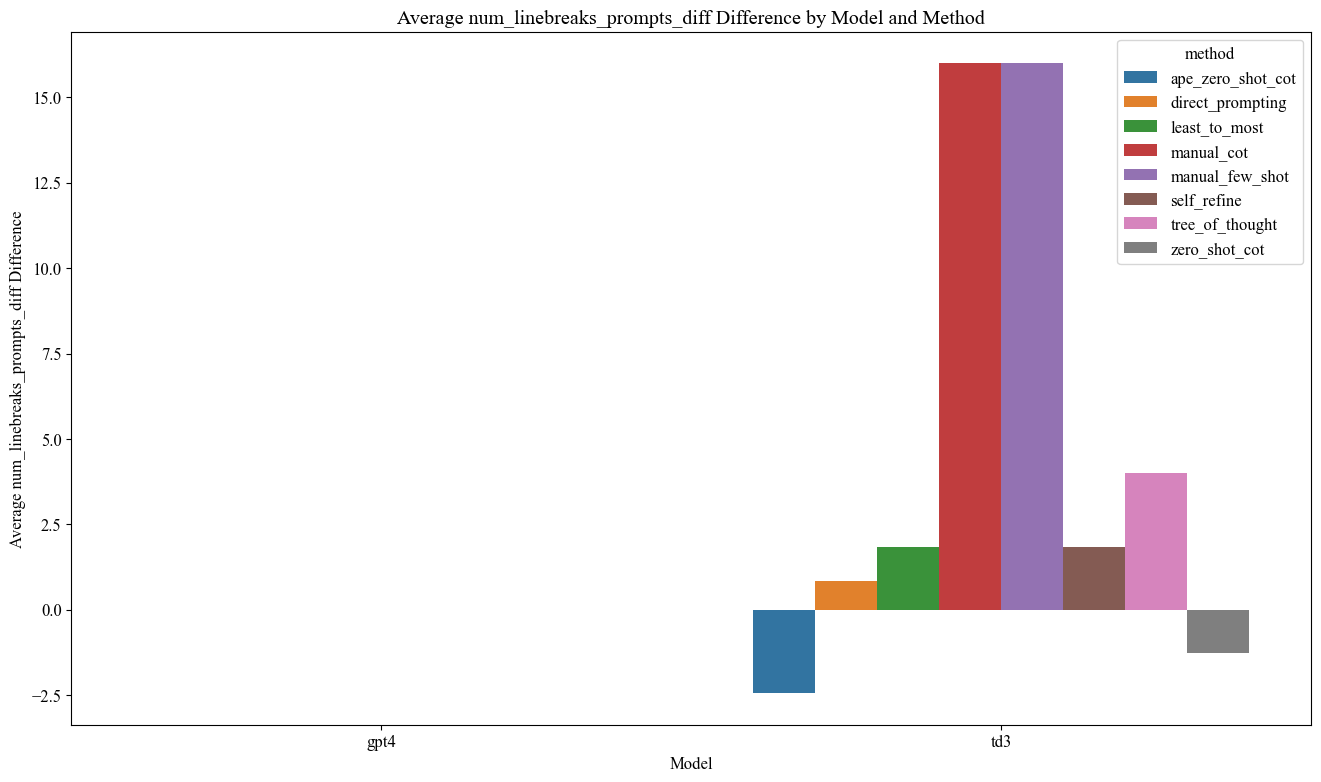

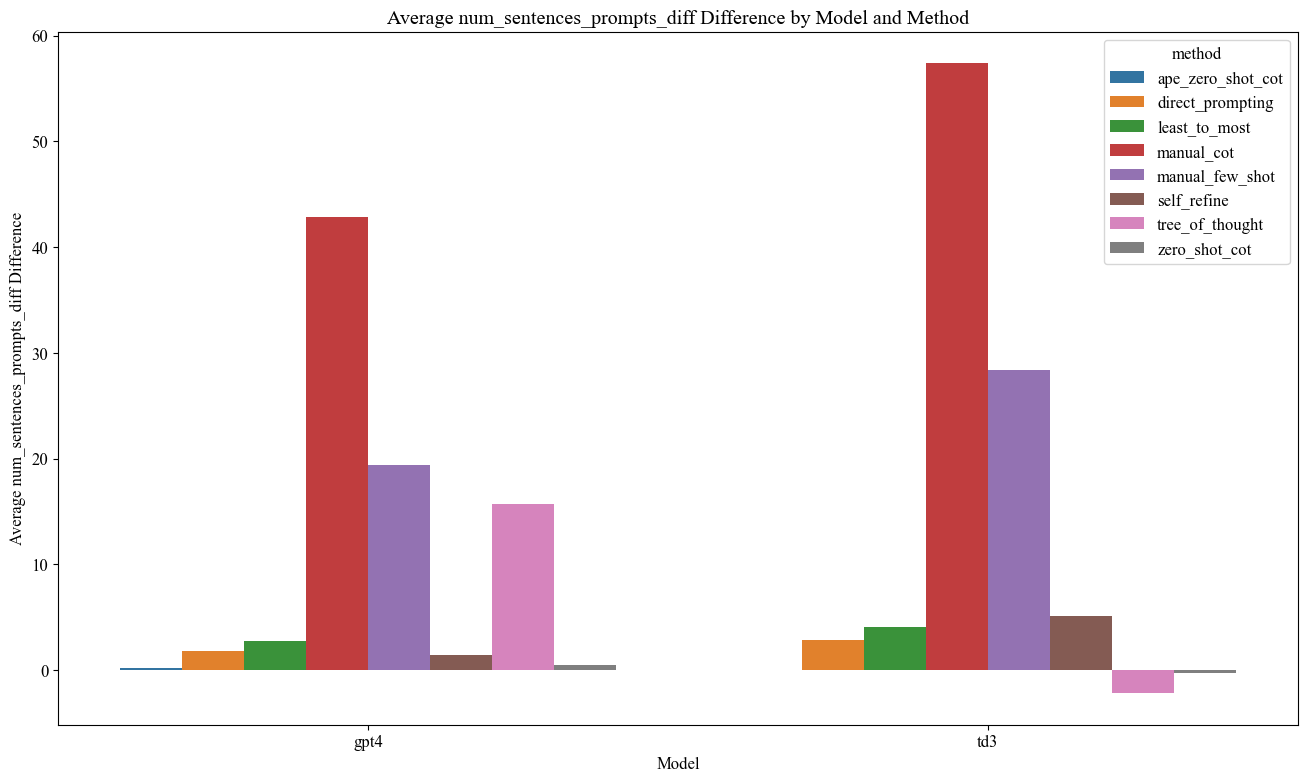

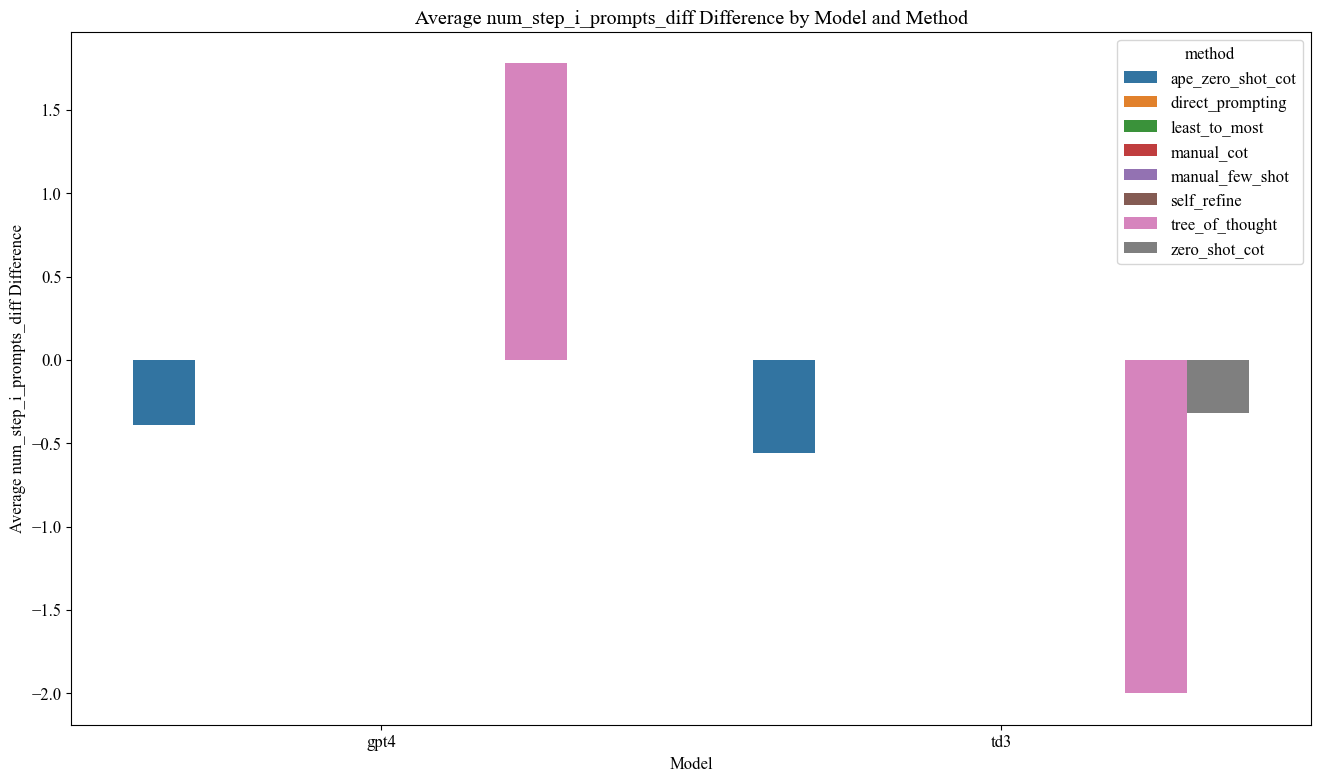

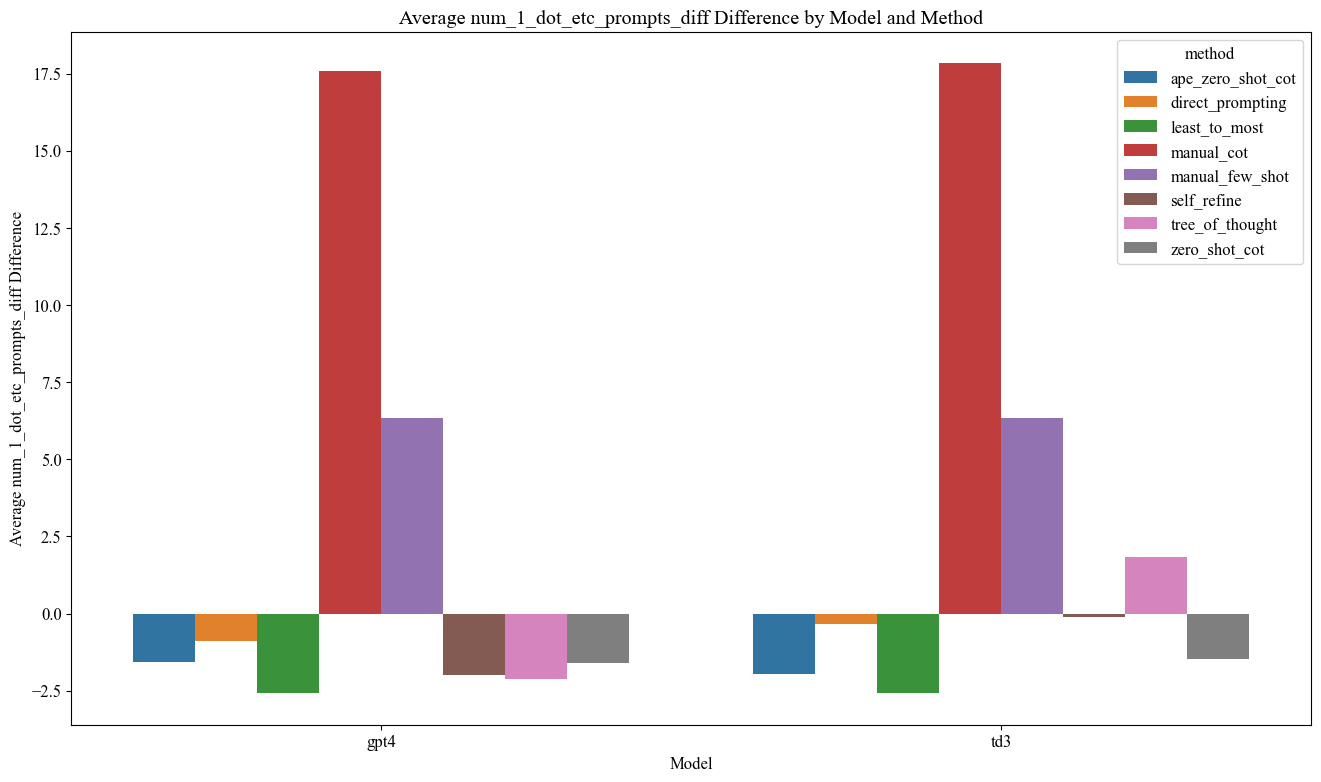

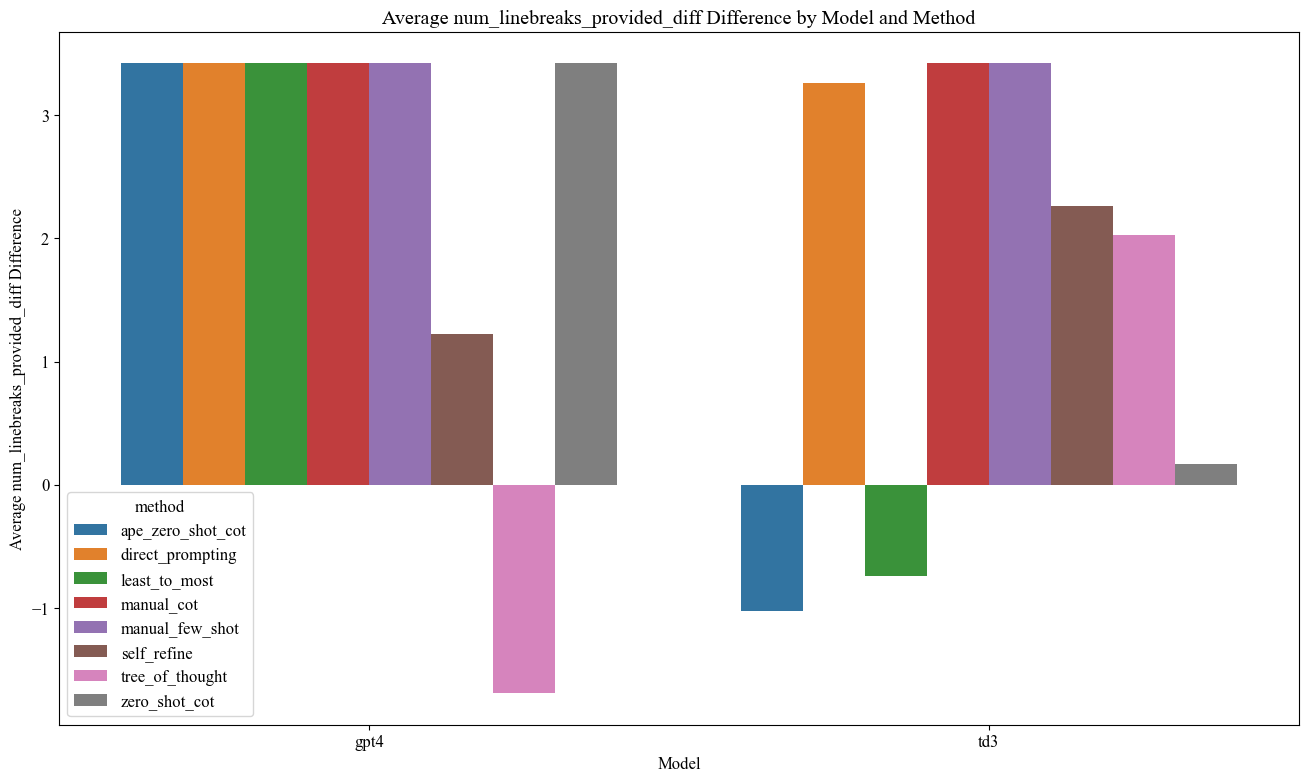

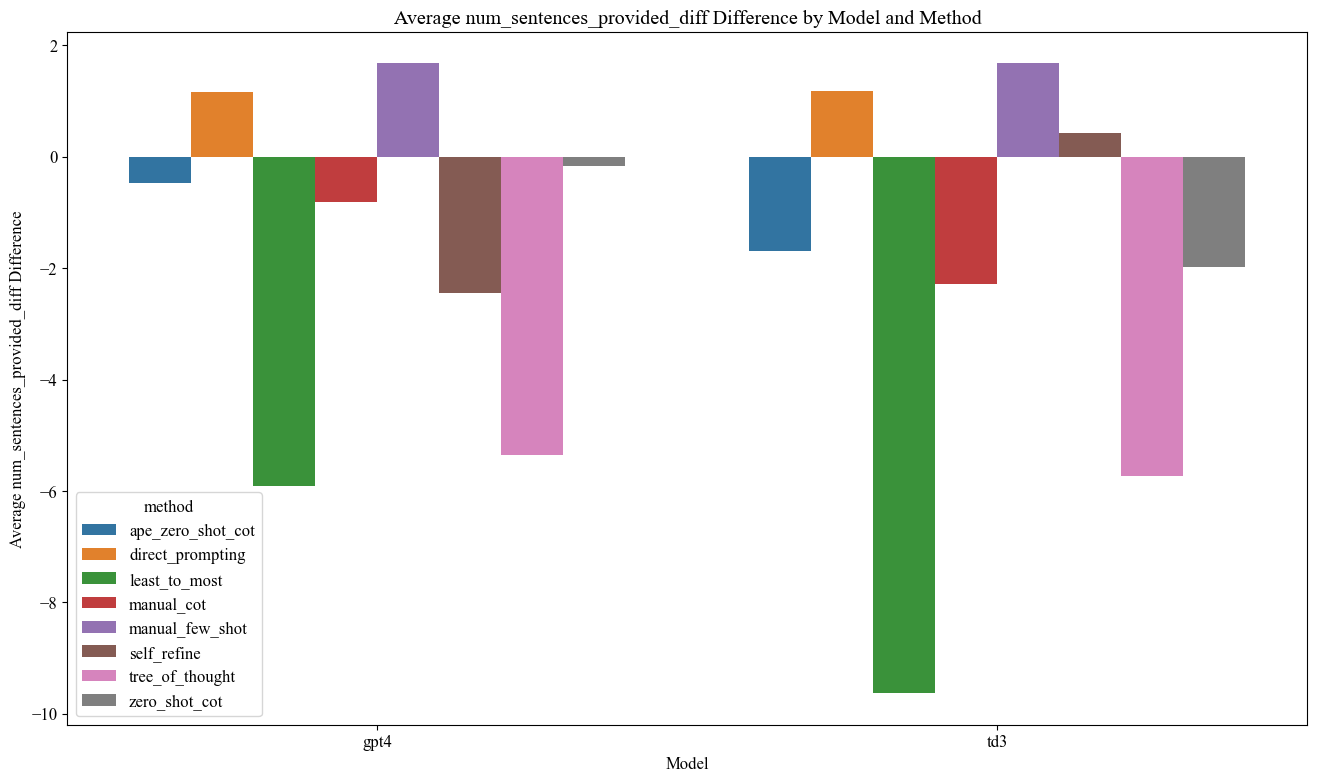

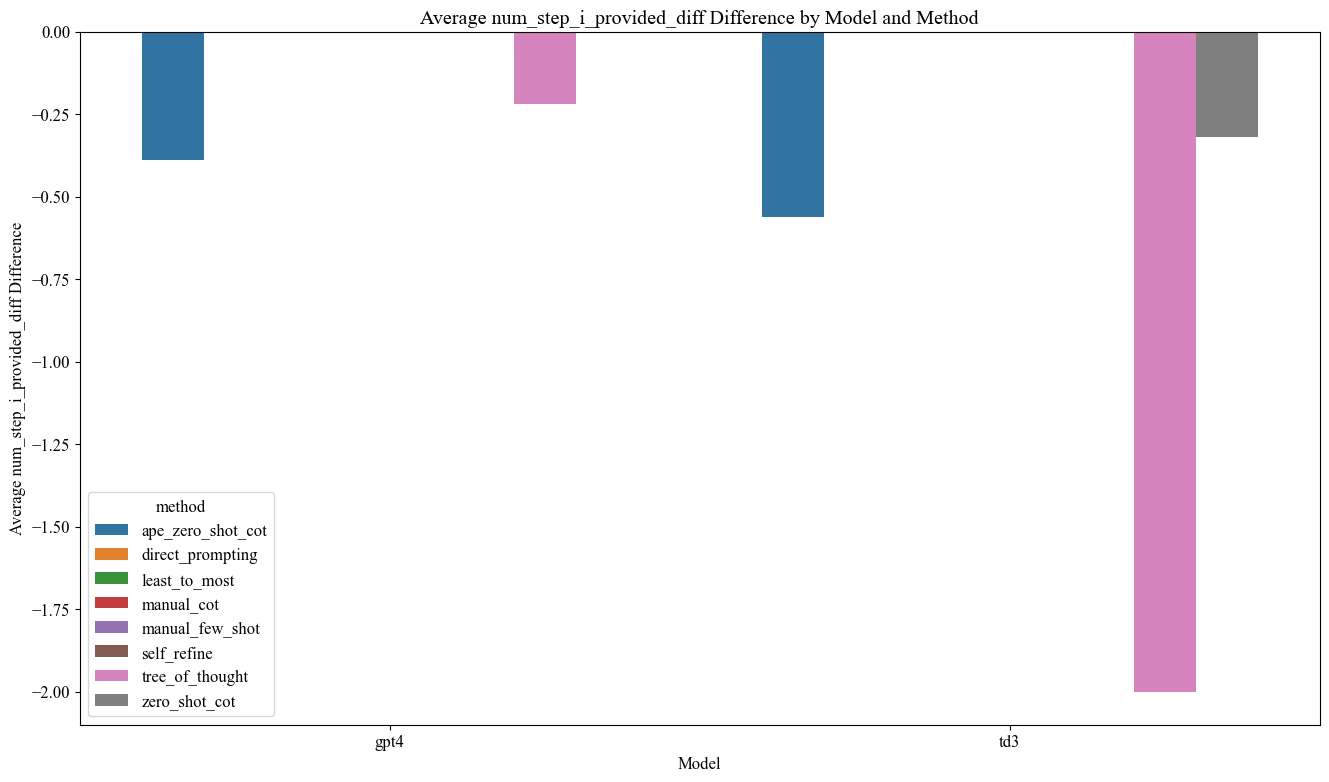

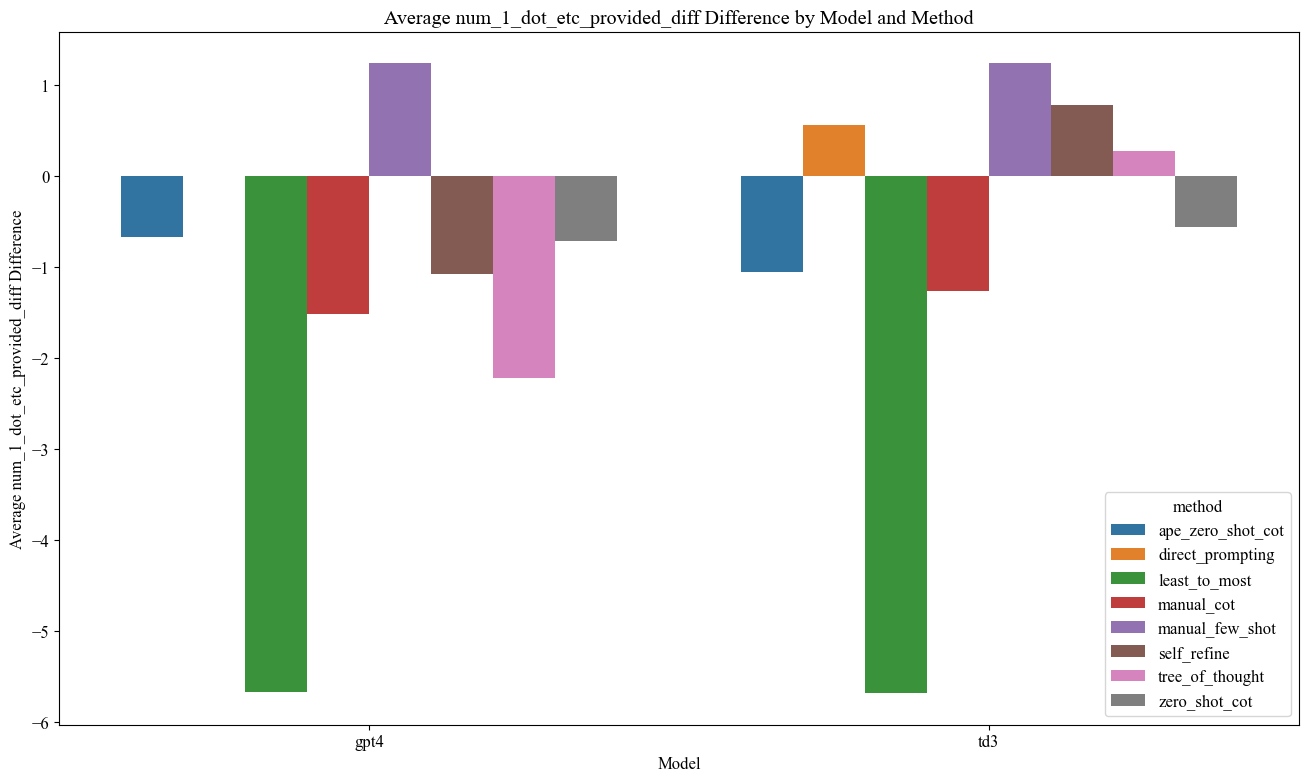

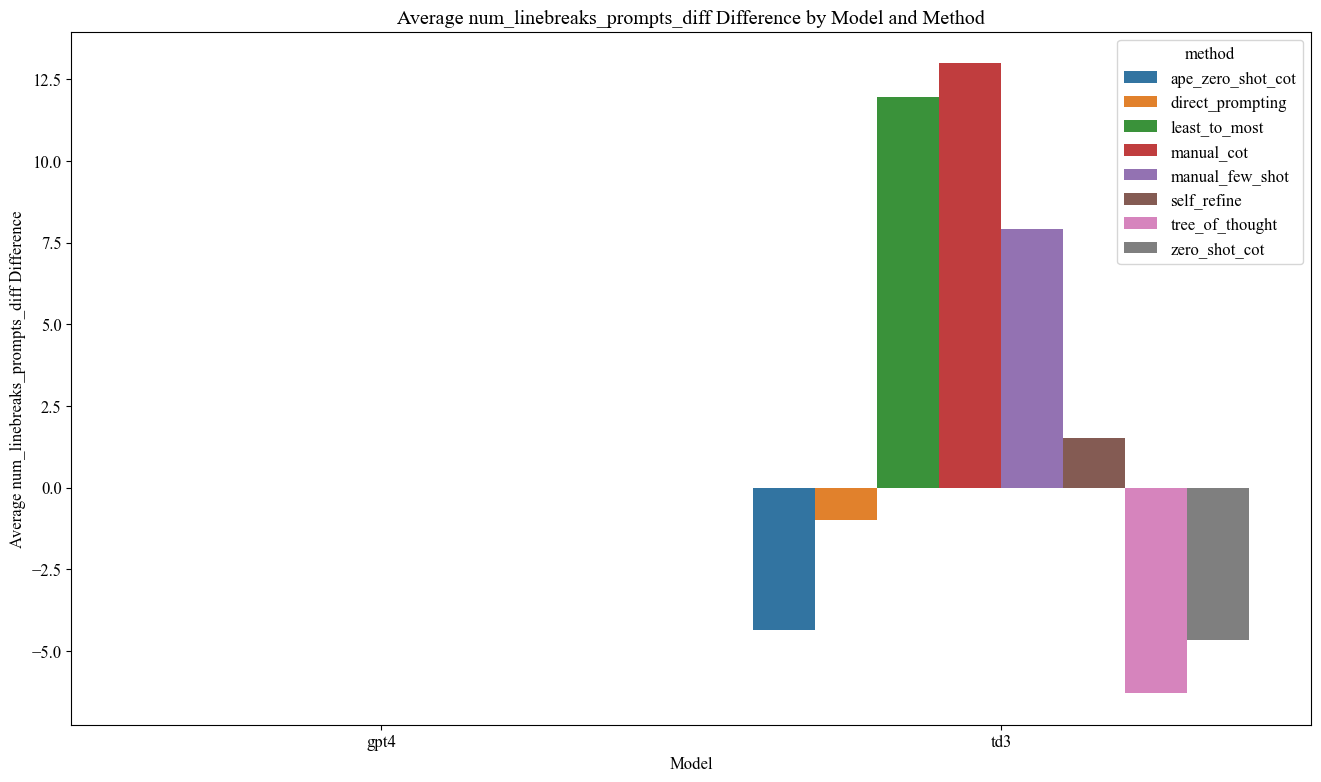

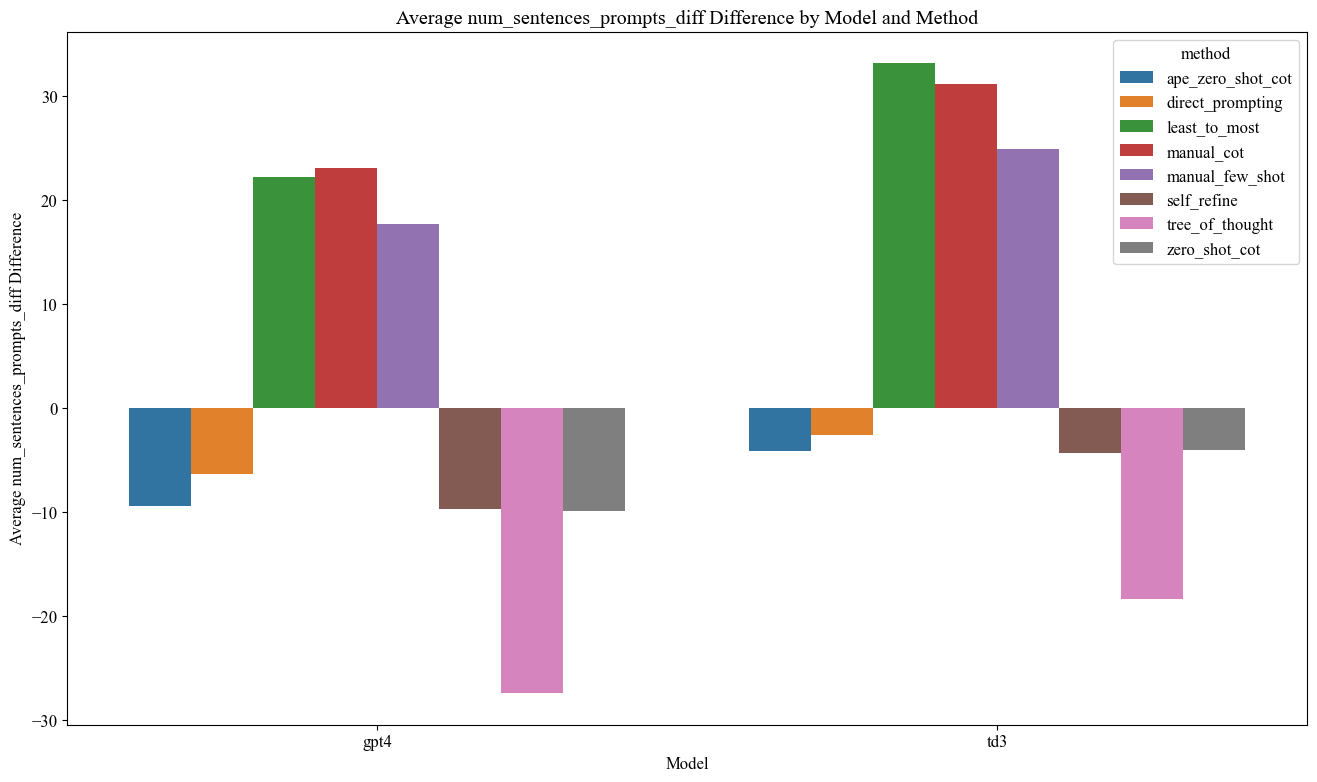

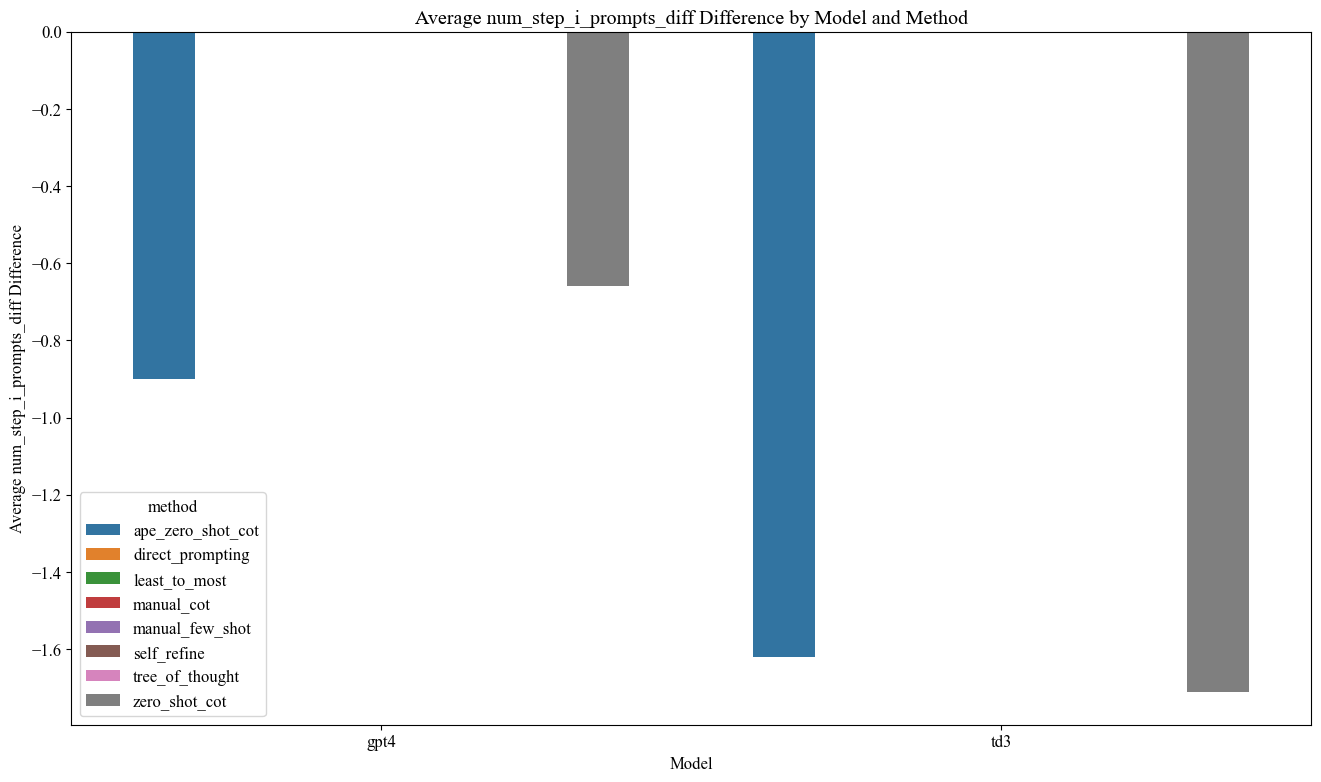

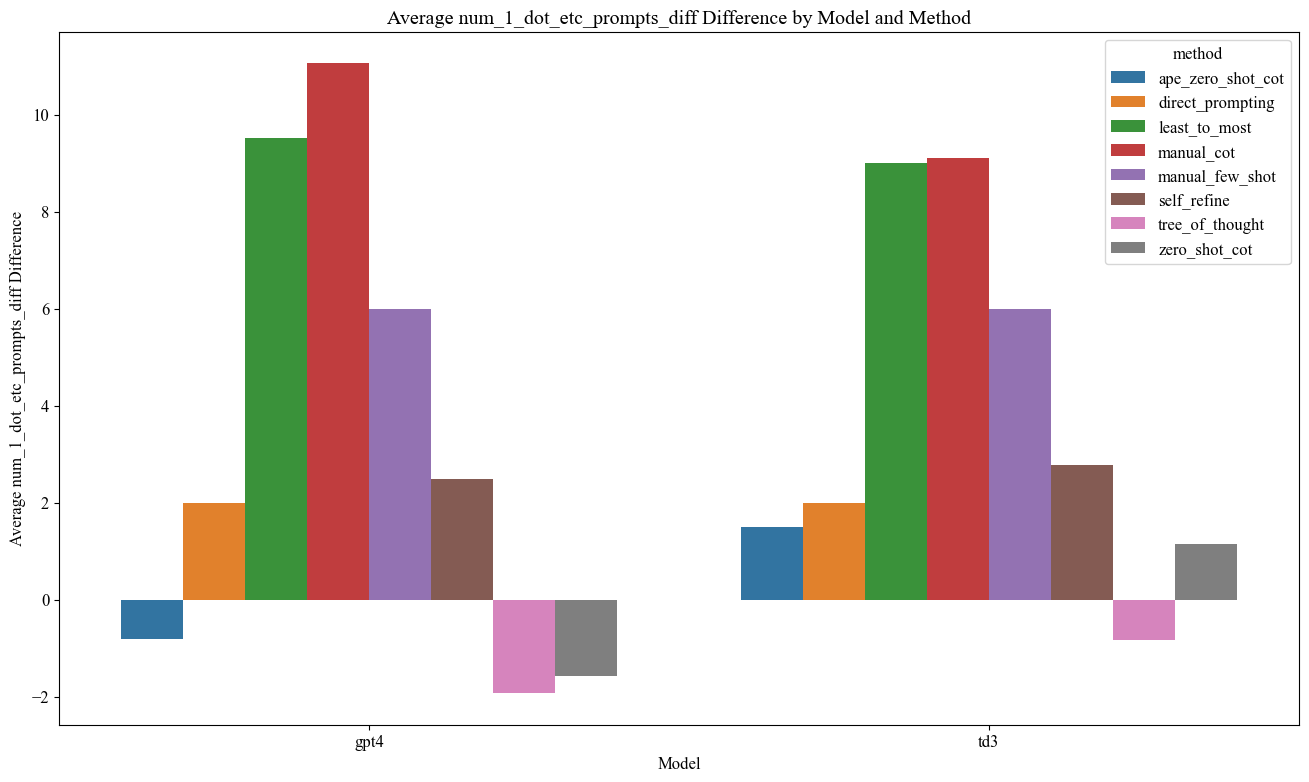

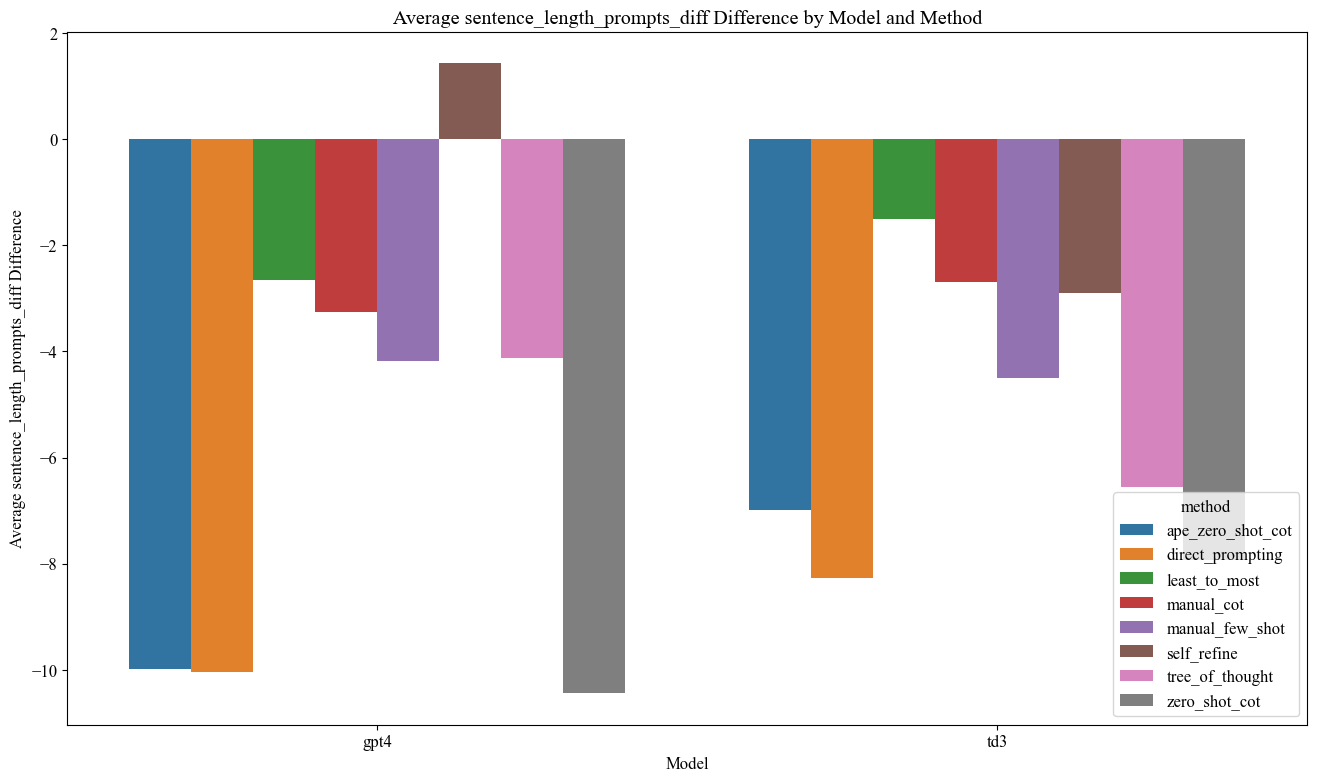

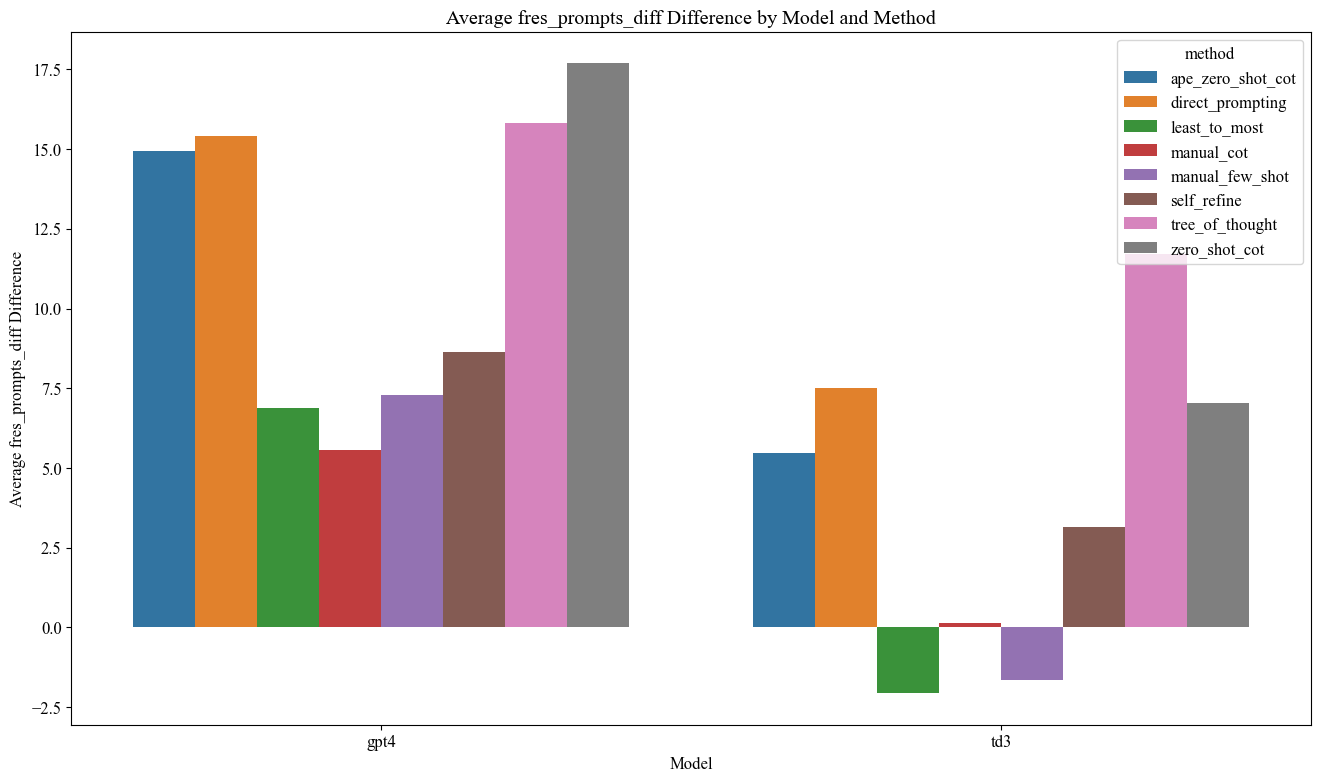

In [87]:
# Create plots of _diff variables by model, task, method

# GSM8k plots
# Loop over variables
comparison_vars_gsm8k = ['num_linebreaks_prompts_diff', 'num_sentences_prompts_diff', 'num_step_i_prompts_diff', 'num_1_dot_etc_prompts_diff', 'num_linebreaks_provided_diff', 'num_sentences_provided_diff', 'num_step_i_provided_diff', 'num_1_dot_etc_provided_diff']
for var in comparison_vars_gsm8k:
    # Plot
    plt.figure(figsize=(16, 9))
    sns.barplot(x='model', y=var, hue='method', data=differences[differences['task'] == 'gsm8k'])
    plt.xlabel('Model')
    plt.ylabel('Average ' + var + ' Difference')
    plt.title('Average ' + var + ' Difference by Model and Method')
    plt.savefig('../Output/gsm8k_' + var + '.png')
    plt.show()

# Creative writing plots
# Loop over variables
comparison_vars_cw = ['num_linebreaks_prompts_diff', 'num_sentences_prompts_diff', 'num_step_i_prompts_diff', 'num_1_dot_etc_prompts_diff', 'sentence_length_prompts_diff', 'fres_prompts_diff']
for var in comparison_vars_cw:
    # Plot
    plt.figure(figsize=(16, 9))
    sns.barplot(x='model', y=var, hue='method', data=differences[differences['task'] == 'cw'])
    plt.xlabel('Model')
    plt.ylabel('Average ' + var + ' Difference')
    plt.title('Average ' + var + ' Difference by Model and Method')
    plt.savefig('../Output/cw_' + var + '.png')
    plt.show()


In [88]:
#means_table(combined_data, 'ease_of_review_1_easy_10_hard')
